This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Quick-view a RHI sweep in polar or cartesian reference systems

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import wradlib as wrl
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()

### Read a RHI polar data set from University Bonn XBand radar

In [2]:
filename = wrl.util.get_wradlib_data_file('hdf5/2014-06-09--185000.rhi.mvol')
data1, metadata = wrl.io.read_gamic_hdf5(filename)
img = data1['SCAN0']['ZH']['data']
# mask data array for better presentation
mask_ind = np.where(img <= np.nanmin(img))
img[mask_ind] = np.nan
img = np.ma.array(img, mask=np.isnan(img))

r = metadata['SCAN0']['r']
th = metadata['SCAN0']['el']
az = metadata['SCAN0']['az']
site = (metadata['VOL']['Longitude'], metadata['VOL']['Latitude'],
        metadata['VOL']['Height'])

Inspect the data set a little

In [3]:
print("Shape of polar array: %r\n" % (img.shape,))
print("Some meta data of the RHI file:")
print("\tdatetime: %r" % (metadata['SCAN0']['Time'],))

Shape of polar array: (450, 667)

Some meta data of the RHI file:
	datetime: b'2014-06-09T18:50:01.000Z'


### The simplest way to plot this dataset

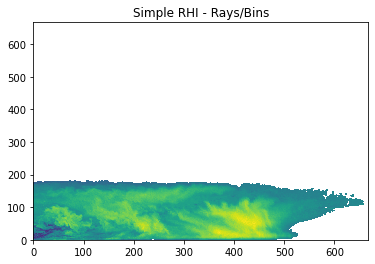

In [4]:
ax, pm = wrl.vis.plot_rhi(img)
txt = pl.title('Simple RHI - Rays/Bins')

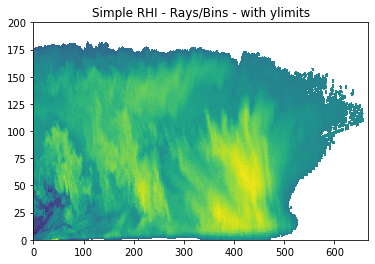

In [5]:
ax, pm = wrl.vis.plot_rhi(img)
ax.set_ylim(0, 200)
txt = pl.title('Simple RHI - Rays/Bins - with ylimits')

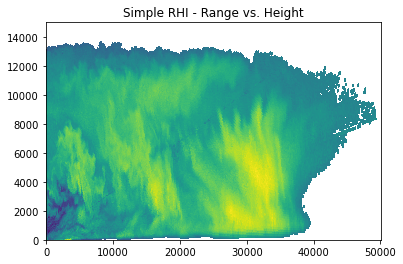

In [6]:
ax, pm = wrl.vis.plot_rhi(img, r=r, th=th)
ax.set_ylim(0, 15000)
txt = pl.title('Simple RHI - Range vs. Height')

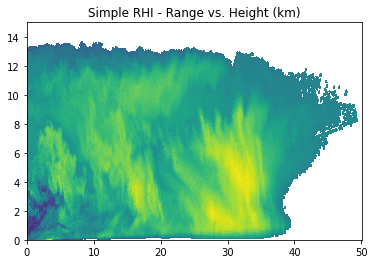

In [7]:
ax, pm = wrl.vis.plot_rhi(img, r=r, th=th, rf=1e3)
ax.set_ylim(0, 15)
txt = pl.title('Simple RHI - Range vs. Height (km)')

### More decorations and annotations

You can annotate these plots by using standard matplotlib methods.

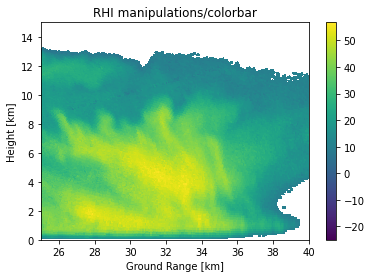

In [8]:
ax, pm = wrl.vis.plot_rhi(img, r=r, th=th, rf=1e3)
ylabel = ax.set_xlabel('Ground Range [km]')
ylabel = ax.set_ylabel('Height [km]')
title = ax.set_title('RHI manipulations/colorbar')
# you can now also zoom - either programmatically or interactively
xlim = ax.set_xlim(25, 40)
ylim = ax.set_ylim(0, 15)
# as the function returns the axes- and 'mappable'-objects colorbar needs, adding a colorbar is easy
cb = pl.colorbar(pm, ax=ax)